In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from si_prefix import si_format
from plot_labler import axes_labels, make_grids, sigfig_format

In [11]:
df_vtc = pd.read_csv("opamp_vtc_2.txt", delimiter = "\s+")
df_iout = pd.read_csv("opamp_iout.txt", delimiter = "\s+")
df_ac = pd.read_csv("opamp_ac_closed_loop.txt", delimiter = "\s+")
df_loopgain = pd.read_csv("opamp_loopgain.txt", delimiter = "\s+")

df_vtc.rename({"v(V1)": "V1", "v(V2)": "V2", "v(Vout)": "Vout"}, axis = "columns", inplace = True)
df_vtc.drop("v-sweep", axis = "columns", inplace = True)

df_iout.rename({"v(V1)": "V1", "v(V2)": "V2", "v(Vout)": "Vout", "i(Vout)": "Iout"}, axis = "columns", inplace = True)
df_iout.drop("v-sweep", axis = "columns", inplace = True)

df_ac.rename({"frequency": "freq", "db(v(Vout))": "mag", "cph(v(Vout))*360/2/pi": "phase"}, axis = "columns", inplace = True)
df_loopgain.rename({"frequency": "freq", "Tmag": "mag", "Tphase": "phase"}, axis = "columns", inplace = True)

print("df_vtc")
print(df_vtc.head(3))
print()
print("df_iout")
print(df_iout.head(3))
print()
print("df_ac")
print(df_ac.head(3))
print()
print("df_loopgain")
print(df_loopgain.head(3))

df_vtc
      V1   V2      Vout
0  0.000  0.0  0.690751
1  0.001  0.0  0.690751
2  0.002  0.0  0.690751

df_iout
      V1   V2  Vout      Iout
0  0.000  0.6   0.6 -0.000003
1  0.001  0.6   0.6 -0.000003
2  0.002  0.6   0.6 -0.000003

df_ac
       freq       mag     phase
0  1.000000 -0.045477 -0.000013
1  1.122018 -0.045477 -0.000014
2  1.258925 -0.045477 -0.000016

df_loopgain
       freq        mag     phase
0  1.000000  53.405048 -0.005877
1  1.122018  53.405047 -0.006595
2  1.258925  53.405046 -0.007399


/home/madvlsi/dev/git/vlsi/mp3/simulation_results/plot_labler.py:13: RuntimeWarning: divide by zero encountered in log10
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)
/home/madvlsi/dev/git/vlsi/mp3/simulation_results/plot_labler.py:13: RuntimeWarning: invalid value encountered in scalar remainder
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)


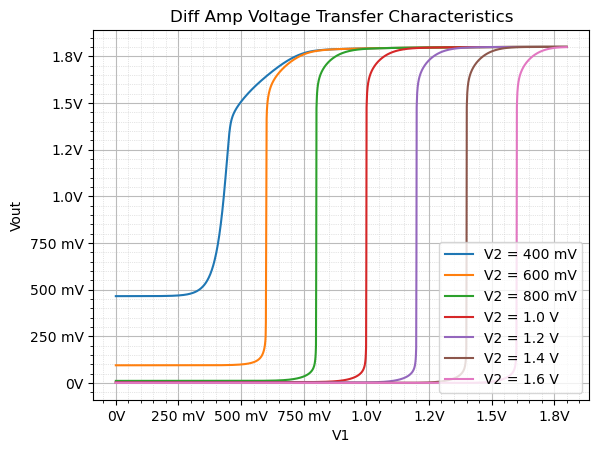

In [3]:
plt.figure()
axes_labels("V1", "V", "Vout", "V", "Diff Amp Voltage Transfer Characteristics")
for v2_val in [0.4,0.6, 0.8, 1.0, 1.2, 1.4, 1.6]:
    this_sweep = df_vtc[df_vtc["V2"] == v2_val]
    plt.plot(np.array(this_sweep["V1"]), np.array(this_sweep["Vout"]), label = f"V2 = {sigfig_format(v2_val, sigfigs = 2)}V")
make_grids()
plt.legend(loc = "lower right")

/home/madvlsi/dev/git/vlsi/mp3/simulation_results/plot_labler.py:13: RuntimeWarning: divide by zero encountered in log10
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)
/home/madvlsi/dev/git/vlsi/mp3/simulation_results/plot_labler.py:13: RuntimeWarning: invalid value encountered in scalar remainder
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)


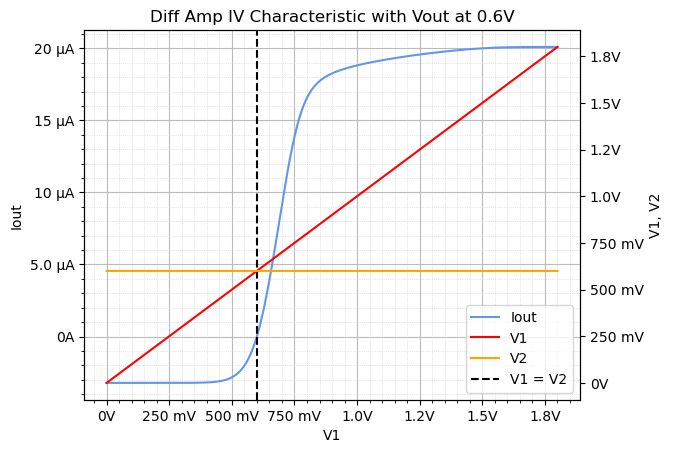

In [10]:
plt.figure()
ax_left = plt.gca()
ax_right = ax_left.twinx()
ax_left.plot(np.array(df_iout["V1"]), np.array(df_iout["Iout"]), color = "cornflowerblue", label = "Iout")
ax_right.plot(np.array(df_iout["V1"]), np.array(df_iout["V1"]), color = "red", label = "V1")
ax_right.plot(np.array(df_iout["V1"]), np.array(df_iout["V2"]), color = "orange", label = "V2")
ax_left.plot([], [], color = "red", label = "V1")
ax_left.plot([], [], color = "orange", label = "V2")
ax_left.axvline(x = 0.6, color = "black", linestyle = "dashed", label = "V1 = V2")
make_grids(ax_left)
axes_labels("V1", "V", "V1, V2", "V", ax = ax_right)
axes_labels("V1", "V", "Iout", "A", "Diff Amp IV Characteristic with Vout at 0.6V", ax = ax_left)
ax_left.legend(loc = "lower right")

/home/madvlsi/dev/git/vlsi/mp3/simulation_results/plot_labler.py:13: RuntimeWarning: divide by zero encountered in log10
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)
/home/madvlsi/dev/git/vlsi/mp3/simulation_results/plot_labler.py:13: RuntimeWarning: invalid value encountered in scalar remainder
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)


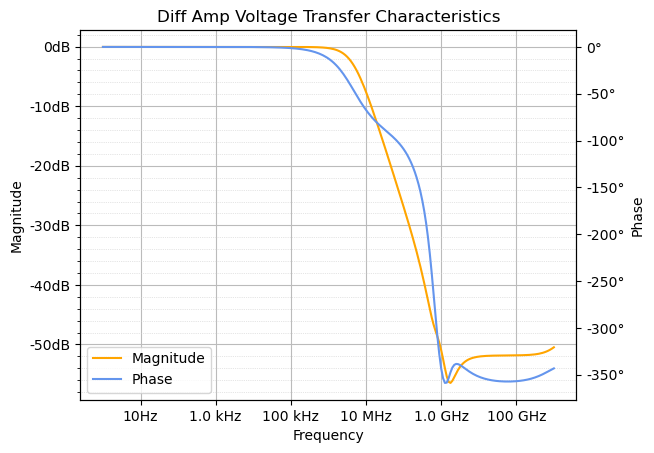

In [5]:
plt.figure()
ax_left = plt.gca()
ax_right = ax_left.twinx()
ax_left.semilogx(np.array(df_ac["freq"]), np.array(df_ac["mag"]), color = "orange", label = "Magnitude")
ax_right.semilogx(np.array(df_ac["freq"]), np.array(df_ac["phase"]), color = "cornflowerblue", label = "Phase")
ax_left.semilogx([], [], color = "cornflowerblue", label = "Phase")
make_grids(ax_left)
axes_labels("", "", "Phase", "°", ax = ax_right)
axes_labels("Frequency", "Hz", "Magnitude", "dB", "Diff Amp Voltage Transfer Characteristics", ax = ax_left)
ax_left.legend(loc = "lower left")

/home/madvlsi/dev/git/vlsi/mp3/simulation_results/plot_labler.py:13: RuntimeWarning: divide by zero encountered in log10
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)
/home/madvlsi/dev/git/vlsi/mp3/simulation_results/plot_labler.py:13: RuntimeWarning: invalid value encountered in scalar remainder
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)


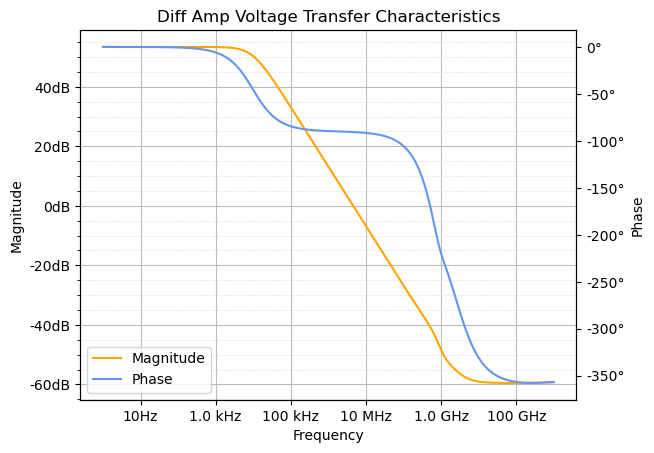

In [6]:
plt.figure()
ax_left = plt.gca()
ax_right = ax_left.twinx()
ax_left.semilogx(np.array(df_loopgain["freq"]), np.array(df_loopgain["mag"]), color = "orange", label = "Magnitude")
ax_right.semilogx(np.array(df_loopgain["freq"]), np.array(df_loopgain["phase"]), color = "cornflowerblue", label = "Phase")
ax_left.semilogx([], [], color = "cornflowerblue", label = "Phase")
make_grids(ax_left)
axes_labels("", "", "Phase", "°", ax = ax_right)
axes_labels("Frequency", "Hz", "Magnitude", "dB", "Diff Amp Voltage Transfer Characteristics", ax = ax_left)
ax_left.legend(loc = "lower left")